**3 - Bonus: Try to predict whether it rains or not in Australia with a neural network.**
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

After you have done your assignment, you have to upload the links of Colab or Kaggle into Github.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix, f1_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# might be needed depending on your version of Jupyter
%matplotlib inline

In [39]:
df = pd.read_csv("weather_cleandata_noOutlier.csv",index_col=[0])
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,DiffTemp,RainTomorrow
0,13.4,22.9,0.6,9.24,8.92,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,3.8,16.9,21.8,0.0,12.0,9.5,0.0
1,7.4,25.1,0.0,7.68,10.36,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,2.2,3.0,17.2,24.3,0.0,12.0,17.7,0.0
2,12.9,25.7,0.0,10.48,11.02,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.8,2.0,21.0,23.2,0.0,12.0,12.8,0.0
3,9.2,28.0,0.0,10.00,12.22,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,2.4,4.0,18.1,26.5,0.0,12.0,18.8,0.0
4,17.5,32.3,1.0,5.64,8.26,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,12.0,14.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126703,3.5,21.8,0.0,4.12,10.88,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,1.6,1.6,9.4,20.9,0.0,6.0,18.3,0.0
126704,2.8,23.4,0.0,3.80,9.78,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,2.4,1.4,10.1,22.4,0.0,6.0,20.6,0.0
126705,3.6,25.3,0.0,4.32,10.20,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.6,1.6,10.9,24.5,0.0,6.0,21.7,0.0
126706,5.4,26.9,0.0,4.48,11.22,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,2.6,3.6,12.5,26.1,0.0,6.0,21.5,0.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126708 entries, 0 to 126707
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        126708 non-null  float64
 1   MaxTemp        126708 non-null  float64
 2   Rainfall       126708 non-null  float64
 3   Evaporation    126708 non-null  float64
 4   Sunshine       126708 non-null  float64
 5   WindGustSpeed  126708 non-null  float64
 6   WindSpeed9am   126708 non-null  float64
 7   WindSpeed3pm   126708 non-null  float64
 8   Humidity9am    126708 non-null  float64
 9   Humidity3pm    126708 non-null  float64
 10  Pressure9am    126708 non-null  float64
 11  Pressure3pm    126708 non-null  float64
 12  Cloud9am       126708 non-null  float64
 13  Cloud3pm       126708 non-null  float64
 14  Temp9am        126708 non-null  float64
 15  Temp3pm        126708 non-null  float64
 16  RainToday      126708 non-null  float64
 17  Month          126708 non-nul

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,126708.0,11.854421,6.048907,-8.2,7.5,11.70,16.2,29.7
MaxTemp,126708.0,23.010345,6.381927,1.2,18.1,22.50,27.7,45.5
Rainfall,126708.0,1.303948,4.058308,0.0,0.0,0.00,0.4,114.4
Evaporation,126708.0,4.875529,3.157937,0.0,2.6,4.36,6.6,74.8
Sunshine,126708.0,7.680305,3.410701,0.0,5.2,8.32,10.4,14.5
WindGustSpeed,126708.0,38.446704,12.119230,7.0,30.0,37.00,46.0,120.0
WindSpeed9am,126708.0,13.430500,8.238609,0.0,7.0,13.00,19.0,63.0
WindSpeed3pm,126708.0,18.212509,8.177845,0.0,13.0,17.00,24.0,78.0
Humidity9am,126708.0,69.050963,17.678303,2.0,57.0,70.00,82.0,100.0
Humidity3pm,126708.0,50.943906,19.238580,1.0,37.0,51.00,64.0,100.0


In [42]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
X_train.shape, y_train.shape

((101366, 19), (101366,))

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
# from sklearn.preprocessing import RobustScaler
# sc = RobustScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [47]:
from tensorflow.keras.layers import Dropout
# DropOut: belirlediğimiz oranda nöronları pasifleştiriyor

In [48]:
model = Sequential()
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid')) # binary classification oldugu icin outbut layer Dense 1 secilir, aktivation function sigmoid.

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

In [49]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15) # loss azalan birsey oldugu icin min secilir, accuracy monite edilseydi max yazilirdi.
model.fit(x=X_train, 
          y=y_train, 
          epochs=350,
          batch_size=32,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/350
3168/3168 [==============================] - 6s 2ms/step - loss: 0.4286 - accuracy: 0.8071 - val_loss: 0.3718 - val_accuracy: 0.8079
Epoch 2/350
3168/3168 [==============================] - 6s 2ms/step - loss: 0.3892 - accuracy: 0.8276 - val_loss: 0.3545 - val_accuracy: 0.8457
Epoch 3/350
3168/3168 [==============================] - 6s 2ms/step - loss: 0.3812 - accuracy: 0.8323 - val_loss: 0.3518 - val_accuracy: 0.8476
Epoch 4/350
3168/3168 [==============================] - 6s 2ms/step - loss: 0.3783 - accuracy: 0.8348 - val_loss: 0.3511 - val_accuracy: 0.8464
Epoch 5/350
3168/3168 [==============================] - 6s 2ms/step - loss: 0.3759 - accuracy: 0.8355 - val_loss: 0.3524 - val_accuracy: 0.8456
Epoch 6/350
3168/3168 [==============================] - 6s 2ms/step - loss: 0.3742 - accuracy: 0.8365 - val_loss: 0.3500 - val_accuracy: 0.8463
Epoch 7/350
3168/3168 [==============================] - 6s 2ms/step - loss: 0.3730 - accuracy: 0.8374 - val_loss: 0.3497 - val_ac

### Evaluation

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 19)                380       
_________________________________________________________________
dropout_4 (Dropout)          (None, 19)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                200       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


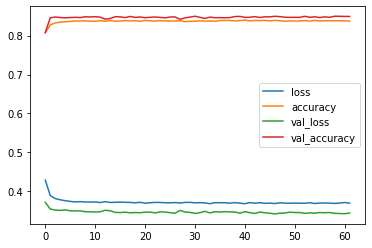

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

**Loss-Epoch Graph**

(0.3, 0.4)

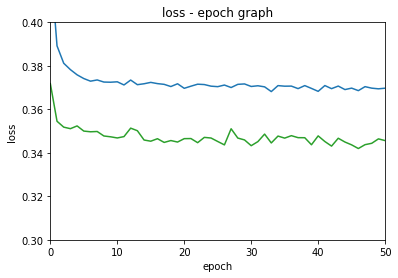

In [53]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,50]) # focusing on the given x values
ax.set_ylim([0.3,0.4]) # focusing on the given y values

**Evaluation Metrics**

In [54]:
y_pred = model.predict_classes(X_test)

In [55]:

print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[19906   442]
[3384 1610]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     20348
         1.0       0.78      0.32      0.46      4994

    accuracy                           0.85     25342
   macro avg       0.82      0.65      0.68     25342
weighted avg       0.84      0.85      0.82     25342



![image.png](attachment:image.png)

In [56]:
model_accuracy = accuracy_score(y_test, y_pred)
model_f1_score = f1_score(y_test, y_pred, average='weighted')
model_recall = recall_score(y_test, y_pred, average='weighted')
print('model_accuracy:',model_accuracy,
      '\nmodel_f1_score:',model_f1_score,
      '\nmodel_recall:',model_recall)

model_accuracy: 0.8490253334385605 
model_f1_score: 0.8225954393806905 
model_recall: 0.8490253334385605


# Results
- A model with artificial neural networks was trained. 0.85 accuracy score with best tuninng parameters was gotten.
- input layer with 19 neurons and 1 output layer were used. There was 1 hidden layer with 10 neurons.
- early_stop was used to save time in model training.